<a href="https://colab.research.google.com/github/DmitryKutsev/DeepHW/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from math import e
from sklearn.metrics import classification_report
from sympy import diff
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.metrics import accuracy_score

import time

In [4]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:

train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
train_dataset.data = train_dataset.data[(train_dataset.targets == 3) | (train_dataset.targets == 7)]
train_dataset.targets = train_dataset.targets[(train_dataset.targets == 3) | (train_dataset.targets == 7)]

test_dataset.data = test_dataset.data[(test_dataset.targets == 3) | (test_dataset.targets == 7)]
test_dataset.targets = test_dataset.targets[(test_dataset.targets == 3) | (test_dataset.targets == 7)]

train_dataset.targets = (train_dataset.targets == 7).long()
test_dataset.targets = (test_dataset.targets == 7).long()
#what is .long()?

In [7]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [8]:
# x = np.random.rand(64, 512)
# y = np.random.rand(512, 1024)

In [9]:

# res.shape == (x.shape[0], y.shape[1])

In [10]:
# x = np.random.rand(64, 512)
# y = np.random.rand(512, 1024)


# for x, y in train_loader:
#     x = x.view(x.shape[0], -1).numpy()
#     y = y.numpy()
#     break


In [11]:
# y = np.random.rand(512, 1024)
# x = np.random.rand(64, 512)

learning_rate = 0.01
epochs = 3

w1 = np.random.rand(784, 3) * learning_rate
b1 = 0 #np.zeros((128, 3))
w2 = np.random.rand(3, 1) * learning_rate
b2 = 0 #np.zeros((128, 1))

loss_func = 0

losses = []

for n_epoch in range(epochs):
    grad_prev = None
    print(f'Epoch: {n_epoch + 1}')

    for x, y in train_loader:
        # print(x.shape, 'x')
        x = x.view(x.shape[0], -1).numpy()
        y = np.expand_dims(y.numpy(), 1)
        #print(x.shape)
        if x.shape[0] == 108:
          continue


        z1 = np.dot(x, w1) + b1
        # print(z1.shape, 'z1')
        a1 = (np.e**z1 - np.e**(-z1))/(np.e**z1 + np.e**(-z1))
        # print(a1.shape, 'a1')
        z2 = np.dot(a1, w2)+ b2
        # print(z2.shape, 'z2')
        # a2 = np.tanh(z2)
        # print(a2.shape, 'a2')
                
        # forward
        # рассчет bce
        my_y = 1/(1 + np.exp(-z2))
        # print(my_y.shape, 'my_y')
        loss = -np.mean(y*np.log(my_y) + (1-y)*np.log(1-my_y))
        losses.append(loss)
          
        # backward
        # print(1, 'b1')
        # print(b2, 'b2')
        # print(dl_db1, 'db1')
        # print(dl_db2, 'db2')
        dl_dy = ((1-y)/(1-my_y) - y**2/my_y)
        # print(dl_dy.shape, 'dl_dy')
        dl_dz2 = (z2 @ my_y.T @ (1-my_y))
        # print(dl_dz2.shape, 'dl_dz2')
        dl_da1 = (dl_dz2 @ w2.T)
        # print(dl_da1.shape, 'dl_da1')
        dl_dw2  =  (a1.T @ dl_dz2)/x.shape[0]
        # print(dl_dw2.shape, 'dl_dw2')
        dl_db2 =  np.mean(dl_dz2)/x.shape[0]

       
        dl_dz1 = (a1 * (1-a1**2))
        # print(dl_dz1.shape, 'dl_dz1')
        # print(w1.shape, 'w1')
        dl_dw1 = (x.T @ dl_dz1)/x.shape[0]
        # print(dl_dw1.shape, 'dl_dw1')
        dl_db1 =  np.mean(dl_dz1)/x.shape[0]

        w1 = w1 - dl_dw1*learning_rate
        w2 = w2 - dl_dw2*learning_rate
        b1 = b1 - dl_db1*learning_rate
        b2 = b1 - dl_db2*learning_rate

        # gradient descent
        # grad_w = np.dot(x.T, grad_prev)
        # grad_x = np.dot(grad_prev, w.T)
        # grad_b = np.dot(np.ones((x.shape[0])), grad_prev)


Epoch: 1
Epoch: 2
Epoch: 3


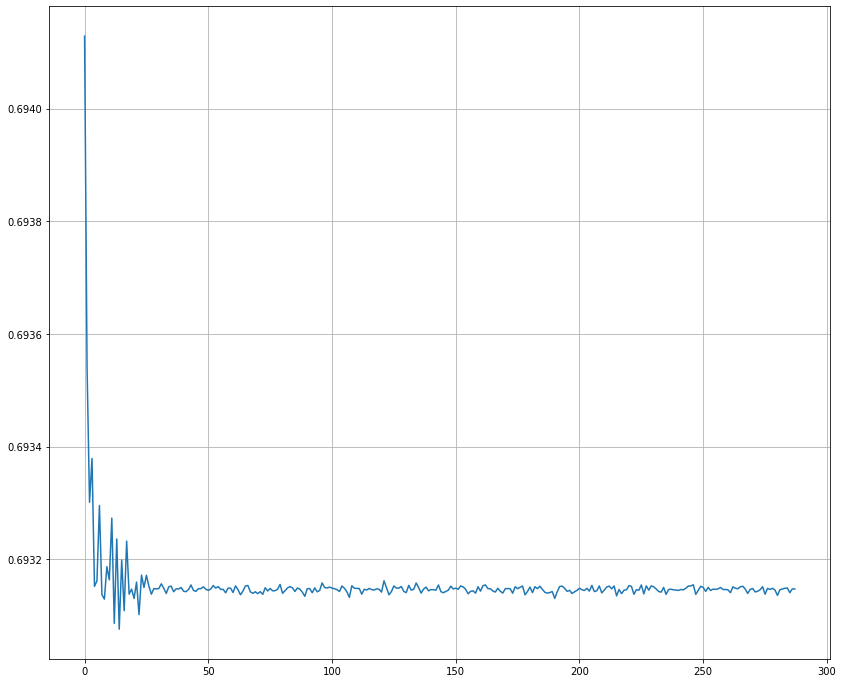

In [12]:
plt.figure(figsize=(14, 12))
plt.plot(losses)
plt.grid()

In [13]:
(np.random.rand(10, 128) @ np.random.rand(128, 784)).shape

(10, 784)

In [217]:
#losses


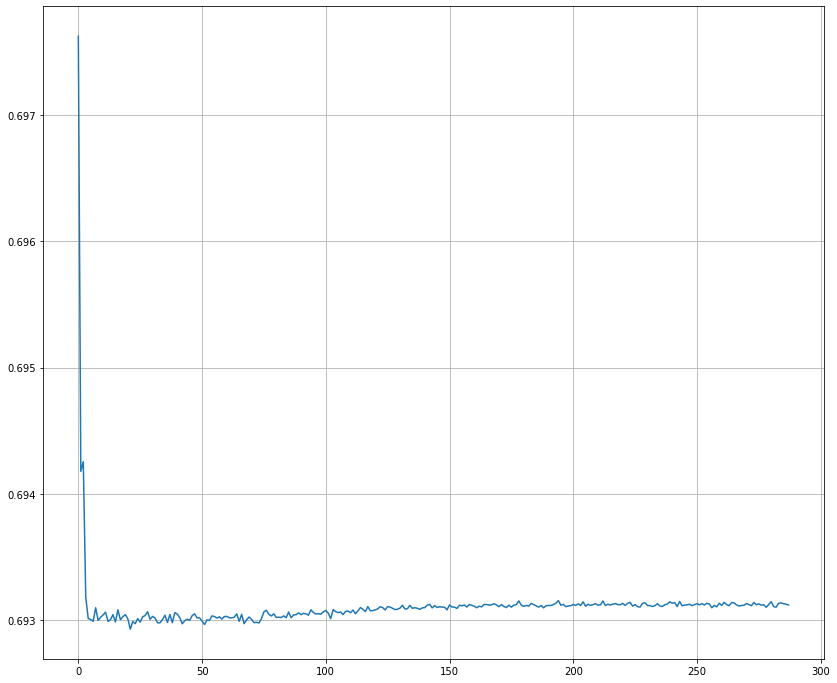

In [216]:

plt.figure(figsize=(14, 12))
plt.plot(losses)
plt.grid()